# Preprocess Dataset

### Count files

In [2]:
 !find train/cat.* -type f | wc -l

10000


In [9]:
 !find train/cat.* -type f | wc -l

12500


In [14]:
 !find train/* -type f | wc -l

20000


### Train / dev split

#### Randomly select 2500 files (20%) of each category from `train` folder and move them to `dev` folder

In [14]:
!mv `ls train/cat* | shuf -n 2500` dev/
!mv `ls train/dog* | shuf -n 2500` dev/

#### count images of cats and dogs in `dev` folder

In [18]:
!find dev/cat.* -type f | wc -l
!find dev/dog.* -type f | wc -l

2500
2500


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import csv
import os
from PIL import Image

%matplotlib inline

In [2]:
def get_avg_ps():
    folder = 'train'
    width, height, count = 0, 0, 0
    for i, filename in enumerate(os.listdir(folder)):
        im = Image.open(os.path.join(folder, filename)).size
#         print(im)
        width+=im[0]
        height+=im[1]
        count += 1
    print(width/count, height/count)

In [3]:
get_avg_ps()

224.0 224.0


In [34]:
def resize(folder):
    for i, filename in enumerate(os.listdir(folder)):
        file = os.path.join(folder, filename)
        im = Image.open(file)
        im_resized = im.resize((224, 224), Image.ANTIALIAS)
        im_resized.save(file, "JPEG")

In [30]:
resize('dev')

In [35]:
resize('train')

In [2]:
#this function takes folder name ('train' or 'dev), reads all images stores image data in `X` and labels in `Y`.
def load_data(folder):
    category = ['cat', 'dog']
    total_images = len(os.listdir(folder))
    X = np.zeros([total_images, 224, 224, 3], dtype='float32')
    Y = np.zeros([total_images, 2], dtype='float32')
    for i, filename in enumerate(os.listdir(folder)):
        file = os.path.join(folder, filename)
        im = mpimg.imread(file)
        X[i] = im
        Y[i][category.index(filename.split('.')[0])] = 1
    return (X, Y)
        
        

In [3]:
%%time
X_train, Y_train = load_data('train')

CPU times: user 57.7 s, sys: 12.9 s, total: 1min 10s
Wall time: 2min 30s


In [4]:
%%time
X_dev, Y_dev = load_data('dev')

CPU times: user 12.1 s, sys: 14.1 s, total: 26.2 s
Wall time: 56.2 s


array([ 0.,  1.], dtype=float32)

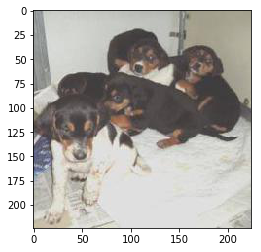

In [20]:
plt.imshow(X_train[7].astype('uint8'))
Y_train[7]

In [21]:
help(np.save)

Help on function save in module numpy.lib.npyio:

save(file, arr, allow_pickle=True, fix_imports=True)
    Save an array to a binary file in NumPy ``.npy`` format.
    
    Parameters
    ----------
    file : file, str, or pathlib.Path
        File or filename to which the data is saved.  If file is a file-object,
        then the filename is unchanged.  If file is a string or Path, a ``.npy``
        extension will be appended to the file name if it does not already
        have one.
    allow_pickle : bool, optional
        Allow saving object arrays using Python pickles. Reasons for disallowing
        pickles include security (loading pickled data can execute arbitrary
        code) and portability (pickled objects may not be loadable on different
        Python installations, for example if the stored objects require libraries
        that are not available, and not all pickled data is compatible between
        Python 2 and Python 3).
        Default: True
    fix_imports : bool

In [22]:
%%time
np.save('data/X_train.npy', X_train)

CPU times: user 52.4 ms, sys: 28.4 s, total: 28.5 s
Wall time: 1min 17s


In [5]:
%%time
np.save('data/X_train.npy', X_train/255)
np.save('data/Y_train.npy', Y_train)
np.save('data/X_dev.npy', X_dev/255)
np.save('data/Y_dev.npy', Y_dev)

CPU times: user 53.6 ms, sys: 5.28 s, total: 5.33 s
Wall time: 10.6 s


In [24]:
%%time
X = np.load('data/X_train.npy')

CPU times: user 0 ns, sys: 1min 35s, total: 1min 35s
Wall time: 4min 13s
